In [155]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_probability as tfp
from tensorflow_probability import edward2 as ed
tfd = tfp.distributions

import seaborn as sns
import pandas as pd
%matplotlib inline



Text(0, 0.5, 'x2')

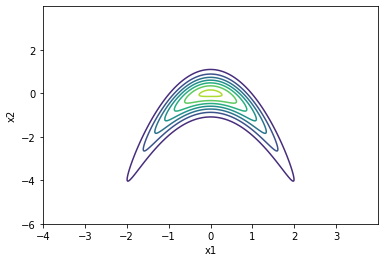

In [156]:
from scipy.stats import multivariate_normal
x, y = np.mgrid[-4:4:.01, -6:4:.01]
pos = np.empty(x.shape + (2,)) 
pos[:, :, 0] = x; pos[:, :, 1] = x**2+y
rv = multivariate_normal([0, 0], [[1, 0], [0, 0.3]])
plt.contour(x, y, rv.pdf(pos))
plt.xlabel("x1")
plt.ylabel("x2")

In [157]:
dtype = np.float32



true_mean = [0, 0]
true_cov = [[1, 0],
                 [0, 1]]
num_results = 100
num_chains = 1


target = tfd.MultivariateNormalFullCovariance(loc=true_mean, covariance_matrix=true_cov)

# Assume that the state is passed as a list of 1-d tensors `x` and `y`.
# Then the target log-density is defined as follows:
def target_log_prob(x, y):
  # Stack the input tensors together
  z = tf.stack([x, x**2+y], axis=-1)
  return target.log_prob(tf.squeeze(z))

# Initial state of the chain
init_state = [-3.,
              -2.]

# Run Random Walk Metropolis with normal proposal for `num_results`
# iterations for `num_chains` independent chains:
samples, kernel_results = tfp.mcmc.sample_chain(
    num_results=num_results,
    current_state=init_state,
    kernel=tfp.mcmc.HamiltonianMonteCarlo(
        target_log_prob_fn=target_log_prob,
        step_size = 0.1,
        num_leapfrog_steps = 5),
    num_burnin_steps=20,
    num_steps_between_results=1,  # Thinning.
    parallel_iterations=1)
samples = tf.stack(samples, axis=-1)

accepted = kernel_results.is_accepted

samples = samples.numpy()
accepted = accepted.numpy()


print(samples)

print('Estimated mean: {}'.format(mean_sample_mean))
print('Estimated avg covariance: {}'.format(mean_sample_cov))
print('Estimated covariance of covariance: {}'.format(cov_sample_cov))

/Users/zhouji/.local/lib/python3.7/site-packages/tensorflow_probability/python/mcmc/sample.py:335: UserWarning: Tracing all kernel results by default is deprecated. Set the `trace_fn` argument to None (the future default value) or an explicit callback that traces the values you are interested in.
  warnings.warn("Tracing all kernel results by default is deprecated. Set "


[[-1.3207195  -2.1327798 ]
 [-0.45142847 -1.4800401 ]
 [-0.6801521  -1.6001201 ]
 [-1.009712   -1.5667034 ]
 [-0.9397616  -0.99438816]
 [-0.39486176 -0.87918425]
 [-1.1570523  -0.50767624]
 [-0.06947183 -0.0747847 ]
 [-0.59679645  0.53902304]
 [ 1.3377922   0.44687277]
 [ 1.1828811   0.05418282]
 [ 0.6200971   0.14386763]
 [ 0.8828299   0.4616911 ]
 [-0.88896847 -0.627939  ]
 [-1.2732651  -0.32595667]
 [ 0.00550824  0.31648552]
 [-0.26777187  0.68379194]
 [-0.0822996  -0.74084175]
 [-1.0741997  -0.3247016 ]
 [-1.258264   -0.01625919]
 [-0.43093285 -0.28131258]
 [-0.12572165 -0.30991155]
 [ 0.12799457  0.18153381]
 [-1.2610711  -0.31709886]
 [-1.1035624  -1.6537414 ]
 [-1.08533    -1.4311993 ]
 [-0.16172612 -0.03628717]
 [-0.5239455   0.56098187]
 [-0.01944412  0.04214139]
 [ 0.33534586 -0.20601107]
 [ 0.58896214  1.141065  ]
 [ 0.64097536  0.9298949 ]
 [-0.13661774  0.7464172 ]
 [-0.30925137  1.085891  ]
 [-0.2869061   1.2619928 ]
 [ 1.062496    0.31542543]
 [ 0.3180875  -0.49019414]
 

In [158]:
x1 = samples[:,0]
y1 = samples[:,1]

In [159]:
# x = samples[:,:,0,1].reshape([num_results*num_chains,1])
# y = samples[:,:,0,0].reshape([num_results*num_chains,1])

Acceptance rate: 100.0%


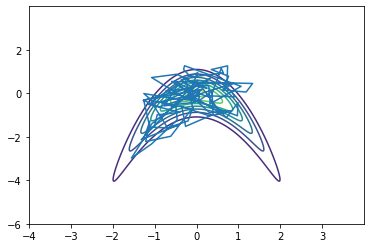

In [160]:
x_accepted = []
y_accepted =[]
for i in range(accepted.shape[0]):
    if accepted[i-1]==True:
        x_accepted = np.append(x_accepted,samples[i-1,0])
        y_accepted = np.append(y_accepted,samples[i-1,1])
plt.plot(x_accepted,y_accepted)
plt.contour(x, y, rv.pdf(pos))
print('Acceptance rate: %0.1f%%' % (100*(x_accepted.shape[0]/num_results)))


In [161]:
dtype = np.float32

true_mean = [0, 0]
true_cov = [[1, 0],
                 [0, 1]]
num_results = 100
num_chains = 1


target = tfd.MultivariateNormalFullCovariance(loc=true_mean, covariance_matrix=true_cov)

# Assume that the state is passed as a list of 1-d tensors `x` and `y`.
# Then the target log-density is defined as follows:
def target_log_prob(x, y):
  # Stack the input tensors together
    z = tf.stack([x, x**2+y], axis=-1)
    return target.log_prob(tf.squeeze(z))

# Initial state of the chain
init_state = [-3.,
              -4.]

# Run Random Walk Metropolis with normal proposal for `num_results`
# iterations for `num_chains` independent chains:
samples, kernel_results = tfp.mcmc.sample_chain(
    num_results=num_results,
    current_state=init_state,
    kernel=tfp.mcmc.RandomWalkMetropolis(
        target_log_prob_fn=target_log_prob),
    num_burnin_steps=20,
    num_steps_between_results=1,  # Thinning.
    parallel_iterations=1)
samples = tf.stack(samples, axis=-1)
accepted = kernel_results.is_accepted

samples = samples.numpy()
accepted = accepted.numpy()


# print('Estimated mean: {}'.format(mean_sample_mean))
# print('Estimated avg covariance: {}'.format(mean_sample_cov))
# print('Estimated covariance of covariance: {}'.format(cov_sample_cov))

/Users/zhouji/.local/lib/python3.7/site-packages/tensorflow_probability/python/mcmc/sample.py:335: UserWarning: Tracing all kernel results by default is deprecated. Set the `trace_fn` argument to None (the future default value) or an explicit callback that traces the values you are interested in.
  warnings.warn("Tracing all kernel results by default is deprecated. Set "


Acceptance rate: 45.0%


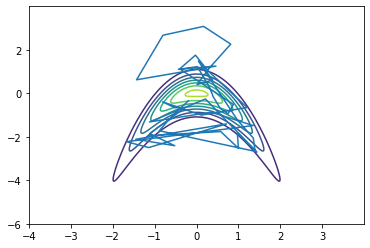

In [162]:
x_accepted = []
y_accepted =[]
for i in range(accepted.shape[0]):
    if accepted[i-1]==True:
        x_accepted = np.append(x_accepted,samples[i-1,0])
        y_accepted = np.append(y_accepted,samples[i-1,1])
plt.plot(x_accepted,y_accepted)
plt.contour(x, y, rv.pdf(pos))

print('Acceptance rate: %0.1f%%' % (100*(x_accepted.shape[0]/num_results)))

/Users/zhouji/anaconda3/envs/Bayes/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  after removing the cwd from sys.path.


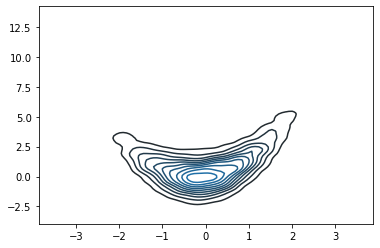

In [163]:
mean = [0, 0]
cov = [[1, 0.9], [0, 0.9]] 

x1, x2 = np.random.multivariate_normal(mean, cov, 10000).T
y1 = x1
y2 = x2+x1**2

sns.kdeplot(y1,y2)


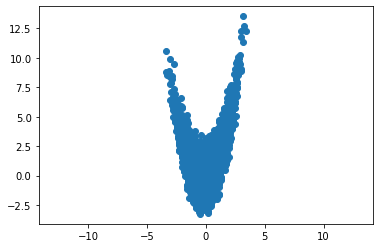

In [164]:
plt.plot(y1, y2,'o')
plt.axis('equal')
plt.show()

### Visual in 3D

In [548]:
x = y1
y = y2
# Define the borders
deltaX = (max(x) - min(x))/10
deltaY = (max(y) - min(y))/10
xmin = min(x) - deltaX
xmax = max(x) + deltaX
ymin = min(y) - deltaY
ymax = max(y) + deltaY
print(xmin, xmax, ymin, ymax)
# Create meshgrid
xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]

-4.480301973769851 4.4854583407115065 -5.647689626407149 17.865299184186142


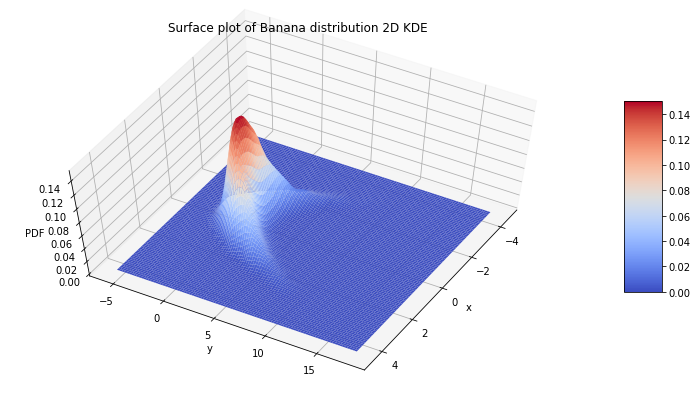

In [549]:
positions = np.vstack([xx.ravel(), yy.ravel()])
values = np.vstack([x, y])
kernel = st.gaussian_kde(values)
f = np.reshape(kernel(positions).T, xx.shape)

fig = plt.figure(figsize=(13, 7))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(xx, yy, f, rstride=1, cstride=1, cmap='coolwarm', edgecolor='none')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('PDF')
ax.set_title('Surface plot of Banana distribution 2D KDE')
fig.colorbar(surf, shrink=0.5, aspect=5) # add color bar indicating the PDF
ax.view_init(60, 30)

Text(0.5, 1.0, '2D Gaussian Kernel density estimation')

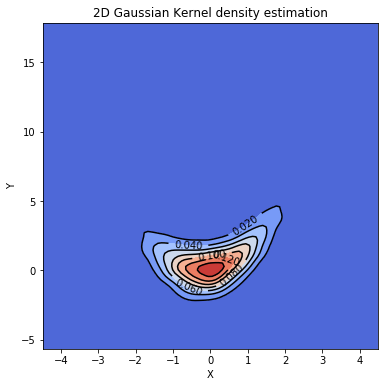

In [550]:
fig = plt.figure(figsize=(6,6))
ax = fig.gca()
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
cfset = ax.contourf(xx, yy, f, cmap='coolwarm')
# ax.imshow(np.rot90(f), cmap='coolwarm', extent=[xmin, xmax, ymin, ymax])
cset = ax.contour(xx, yy, f, colors='k')
ax.clabel(cset, inline=1, fontsize=10)
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.title('2D Gaussian Kernel density estimation')

In [551]:
x1= pd.DataFrame(np.arange(-2,2,0.1))
x2= pd.DataFrame(np.arange(-2,2,0.1))
x1,x2 = np.meshgrid(x1,x2)

x_1 = pd.DataFrame(norm.pdf(x1,0,1))
x_2 = pd.DataFrame(norm.pdf(x2,0,1))

y = x_1*x_2



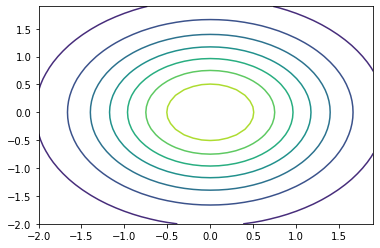

In [552]:
plt.contour(x1,x2,y)

In [165]:
x1,x2 = np.random.multivariate_normal([0,0], [[1,0],[0,1]], 10000).T


In [247]:
#Random Walk MH MCMC
@tf.function
def draw_proposal(m_current):
    
    Xi = tfd.MultivariateNormalFullCovariance(
            loc = m_current,
            covariance_matrix= [[1.,0.],[0.,1.]])
    Xi_s = tfd.Sample(Xi)
    m_proposed = Xi_s.sample()
    return m_proposed
    

def accept_or_not(m_current,m_proposed):
    if not isinstance(m_current,list):m_current = m_current.tolist()
    if not isinstance(m_proposed,list):m_proposed = m_proposed.tolist()
    
    p_accept = rv.pdf([m_proposed[0],m_proposed[0]**2+m_proposed[1]])/rv.pdf([m_current[0],m_current[0]**2+m_current[1]])
    a = np.random.rand()
    accept = a < p_accept
    
#     print("random number =",a)
#     print("probability to accept",p_accept)
    
    return accept

        

In [282]:
def chain(step = 5000):
    resultlist=[]
    initial = [-2, -4]
    m_current = initial
    for s in range(step):
        m_proposed = draw_proposal(m_current)
        m_proposed = m_proposed.numpy()
        accept = accept_or_not(m_current,m_proposed)
        if accept:
            resultlist.append([m_proposed,1])
        else:
            resultlist.append([m_proposed,0])
        
    return resultlist

In [283]:
result = chain()

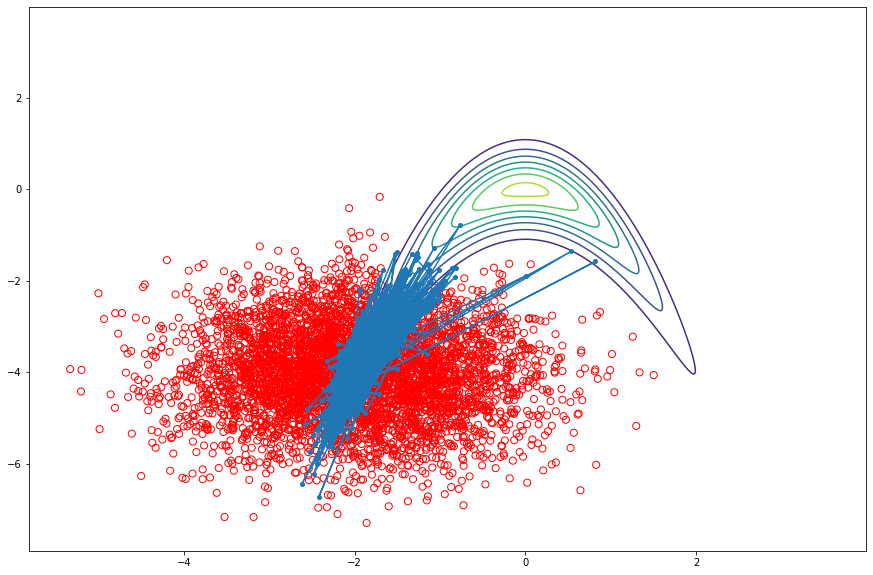

In [284]:
def chain_plot(result):
    chain = [result[i][0] for i in range(np.shape(result)[0])]
    x1 = [chain[i][0] for i in range(np.shape(chain)[0])]
    y1 = [chain[i][1] for i in range(np.shape(chain)[0])]
    re = pd.DataFrame(result)
    accept_point = re[1]==1
    reject_point = re[1]==0
    df_accept = pd.DataFrame(re[accept_point][0].values.tolist(), index = re[accept_point].index)
    df_reject = pd.DataFrame(re[reject_point][0].values.tolist(), index = re[reject_point].index)

    plt.figure(figsize=(15,10))
    plt.plot(df_accept[0],df_accept[1],'-o',markersize=4)
    plt.scatter(df_reject[0],df_reject[1], s=50, facecolors='none', edgecolors='r')

    plt.contour(x, y, rv.pdf(pos))
chain_plot(result)